<div style="text-align:center;">
    <b style="font-size:45px; color:DarkCyan">Visualizing Data Assignment</b><br>
    <b style="font-size:20px;">Kalyan Kola Cahill - C16357813</b>
</div>

In [32]:
library(readxl)
library(dplyr)
library (installr)
library(repr)
library(ggplot2)
library(scales)
library(ggpubr)

<p style="font-family: Lucida Grande; font-size: 20px;">Reading in the cleaned, merged, and wrangled dataset previously
handled in the 'Exploration Notebook'.</p>

In [33]:
cleaned_df <- read.csv(file = '../Data/cleaned_df.csv')

<b style="font-size:25px;">Graph Two</b><br>

<p style="font-family: Lucida Grande; font-size: 20px;">For the first graph we will be visualizing the effect that civil liberties in a country have on the life expectancy of its citizens. There were a number of ways to approach this, and the method chosen here involves graphing the average life expectancy against each of the seven Civil Liberty scores. Each section of the code below is commented to explain what function it serves.<br><br>The completed graph is a ggplot linegraph, where it quite clearly shows the significant drop in average life expectancy with lower levels of Civil Liberties. Great care was taken to ensure the graph was clear, consise, but displayed all the necessary information.</p>

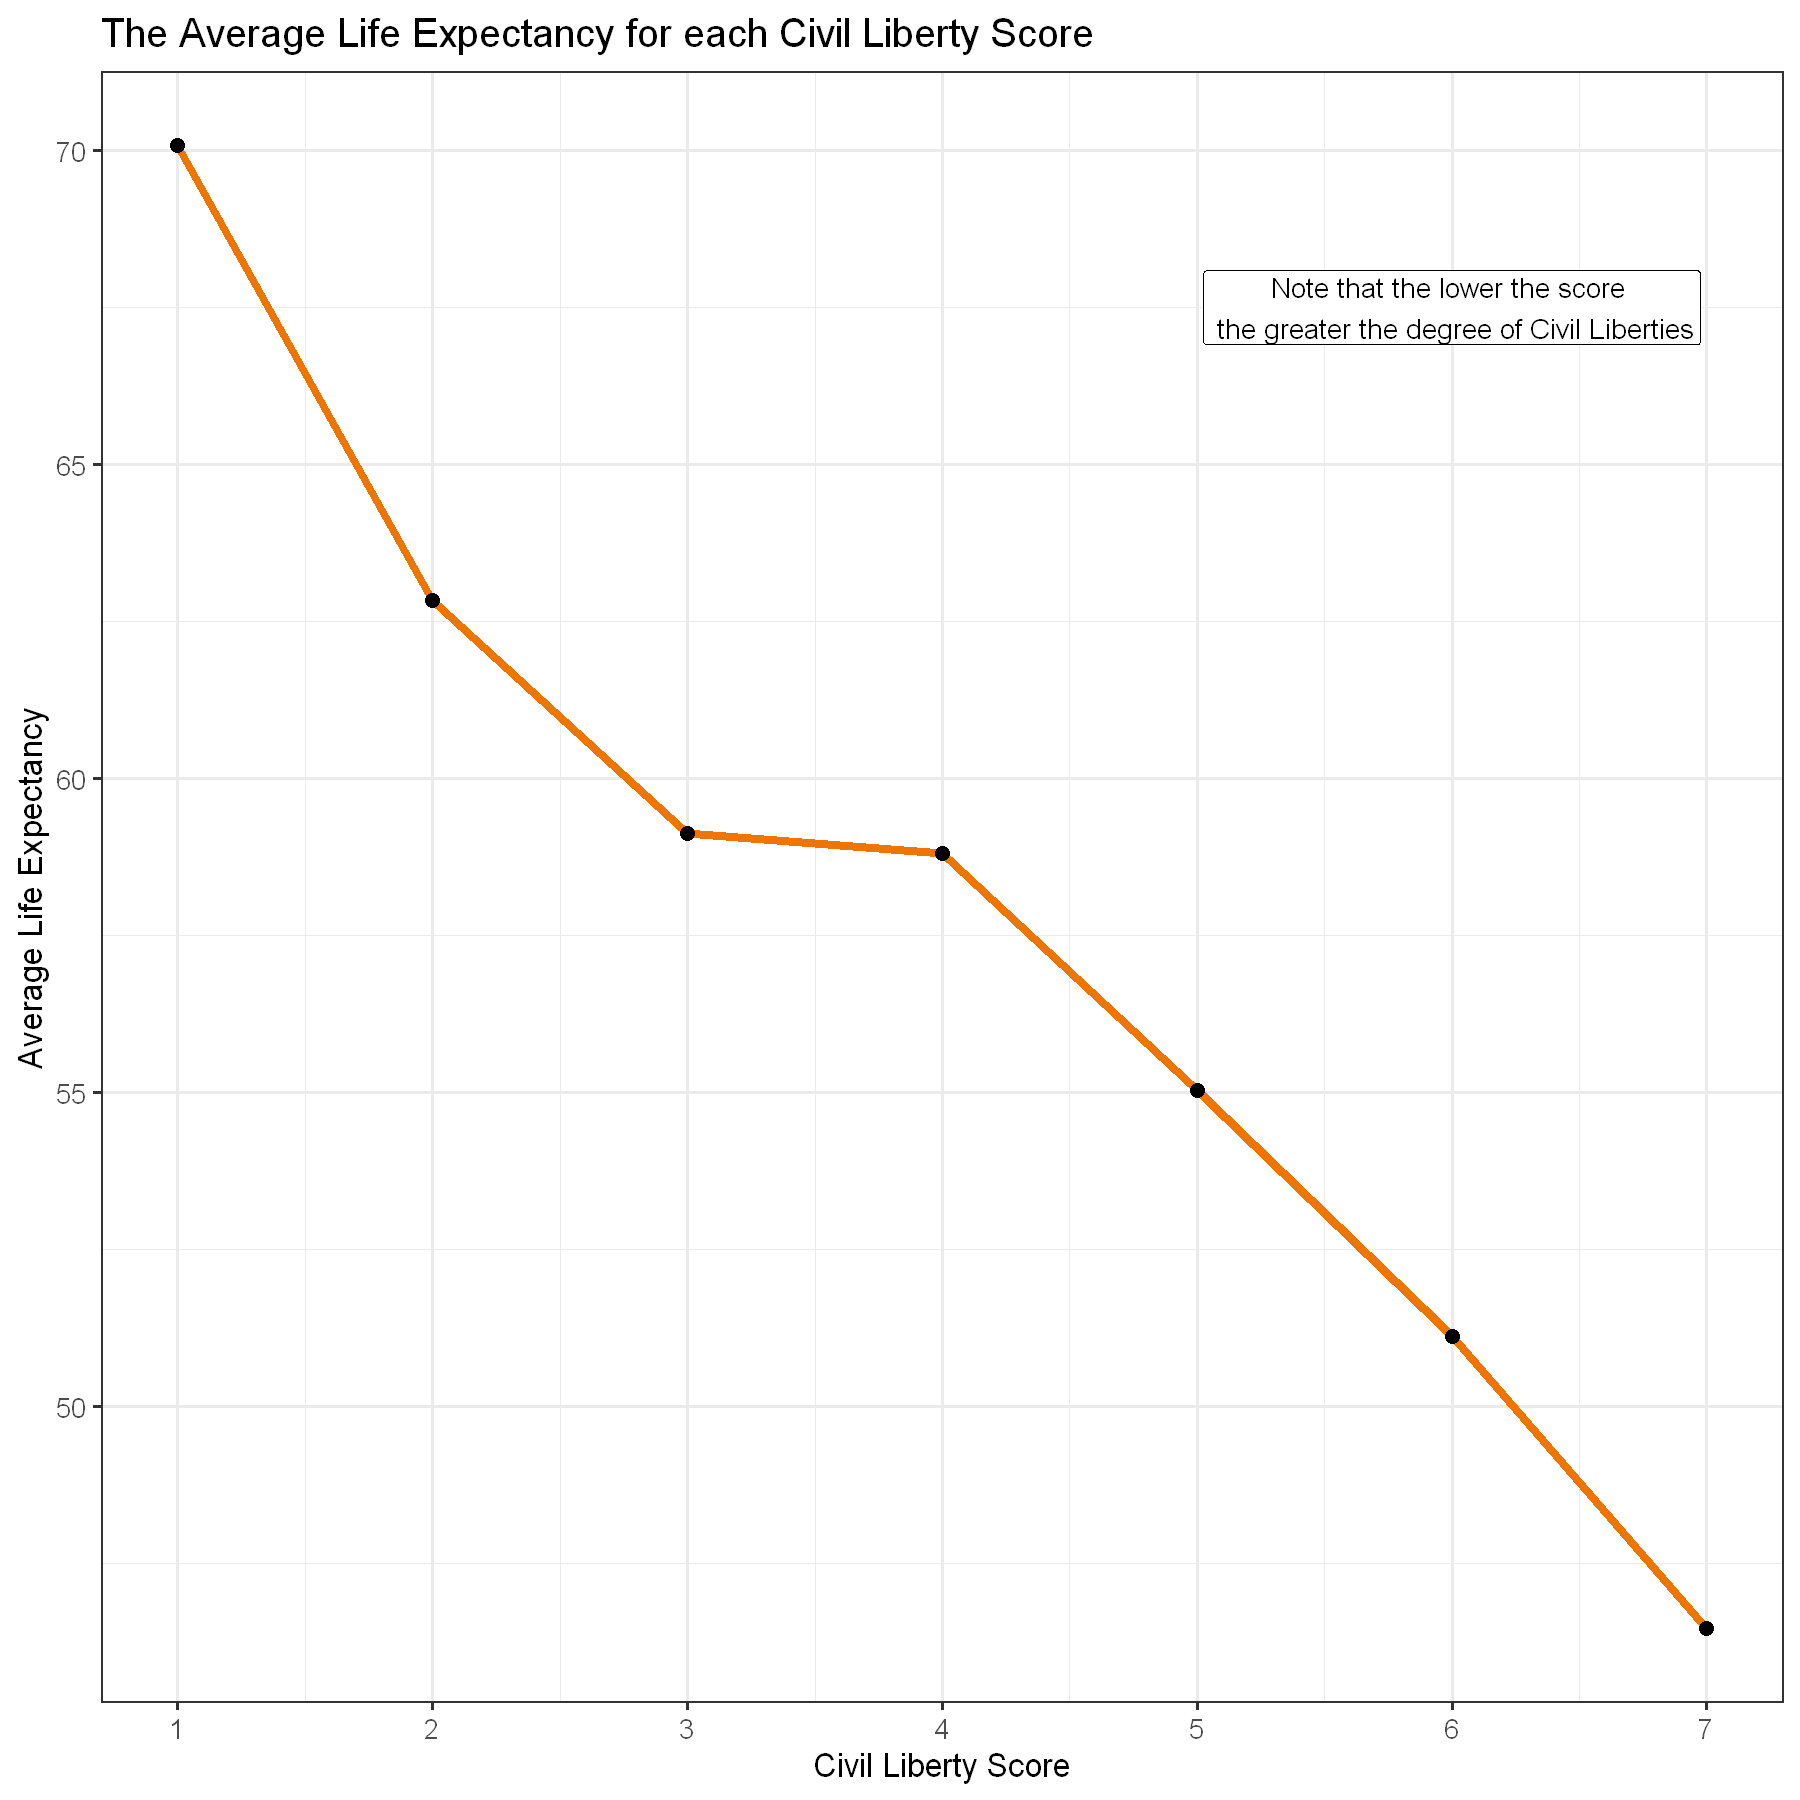

In [34]:
# Find mean of each Civil Liberties rating, plot the mean other bits.
# Life_Expectancy(8) Freedom_Life_Choices(9) Perception_of_Corruption(10) Confidence_in_Government(11)

# Create the lists for the civil liberty scores and average life expectancy.
x = 1
mean_civil_liberties = c()
mean_life = c()

# A function which returns the mean Life Expectancy for each of the Civil Liberty scores passed in.
filter_by_rating <- function(CL) {
    return(mean(filter(cleaned_df, cleaned_df$Civil_Liberties == CL)[[8]], na.rm=TRUE))
}

# A for loop which inserts each unique civil liberty value into a list before calling the above mentioned function for
# each CL value.
for (i in unique(cleaned_df$Civil_Liberties)) {
    mean_civil_liberties[x] <- i
    mean_life[x] <- filter_by_rating(i)
    x = x + 1
}

# Combine the two lists into a single new dataframe for graphing.
mean_df <- do.call(rbind, Map(data.frame, Mean_CL = mean_civil_liberties, Mean_Life = mean_life))

# Create a ggplot line graph, with the Civil Liberty scores on the X axis and the average Life Expectancy on the Y 
# axis. Includes an annotation to ensure readers can fully understand the graph.
options(repr.plot.width=15, repr.plot.height=15)
ggplot(data=mean_df, aes(x=Mean_CL, y=Mean_Life, group=1)) +
  ggtitle("The Average Life Expectancy for each Civil Liberty Score") +
  annotate("label", size = 6, x = 6, y = 67.5, label = "Note that the lower the score \n the greater the degree of Civil Liberties") +
  geom_line(color = "darkorange2", size = 2.5) +
  scale_x_continuous("Civil Liberty Score", breaks=seq(0,7,1)) +
  scale_y_continuous("Average Life Expectancy") +
  theme_bw(base_size = 20) +
  geom_point(size = 4)

<b style="font-size:25px;">Graph Two</b><br>

<p style="font-family: Lucida Grande; font-size: 20px;">The second graph to be visualized is plotting citizens confidence in their national Government, with respect to the perceived levels of corruption. With an incredibly large quantity of continuous values, developing a clear graph which conveys the message without becoming too crowded required a lot of thought. The most effective method of graphing this relationship was to create a barplot which shows the percentage of citizens who are confident in their Government when the perceived levels of corruption are below 50% and above 50%.<br><br>The completed chart has two, color-coded bars representing 'less than 50%' and 'more than 50%' perceived corruption. The confidence in Government is shown as  a percentage on the Y axis. Finally, a custom legend was added to the graph to further improve the clarity of the visualization.</p>

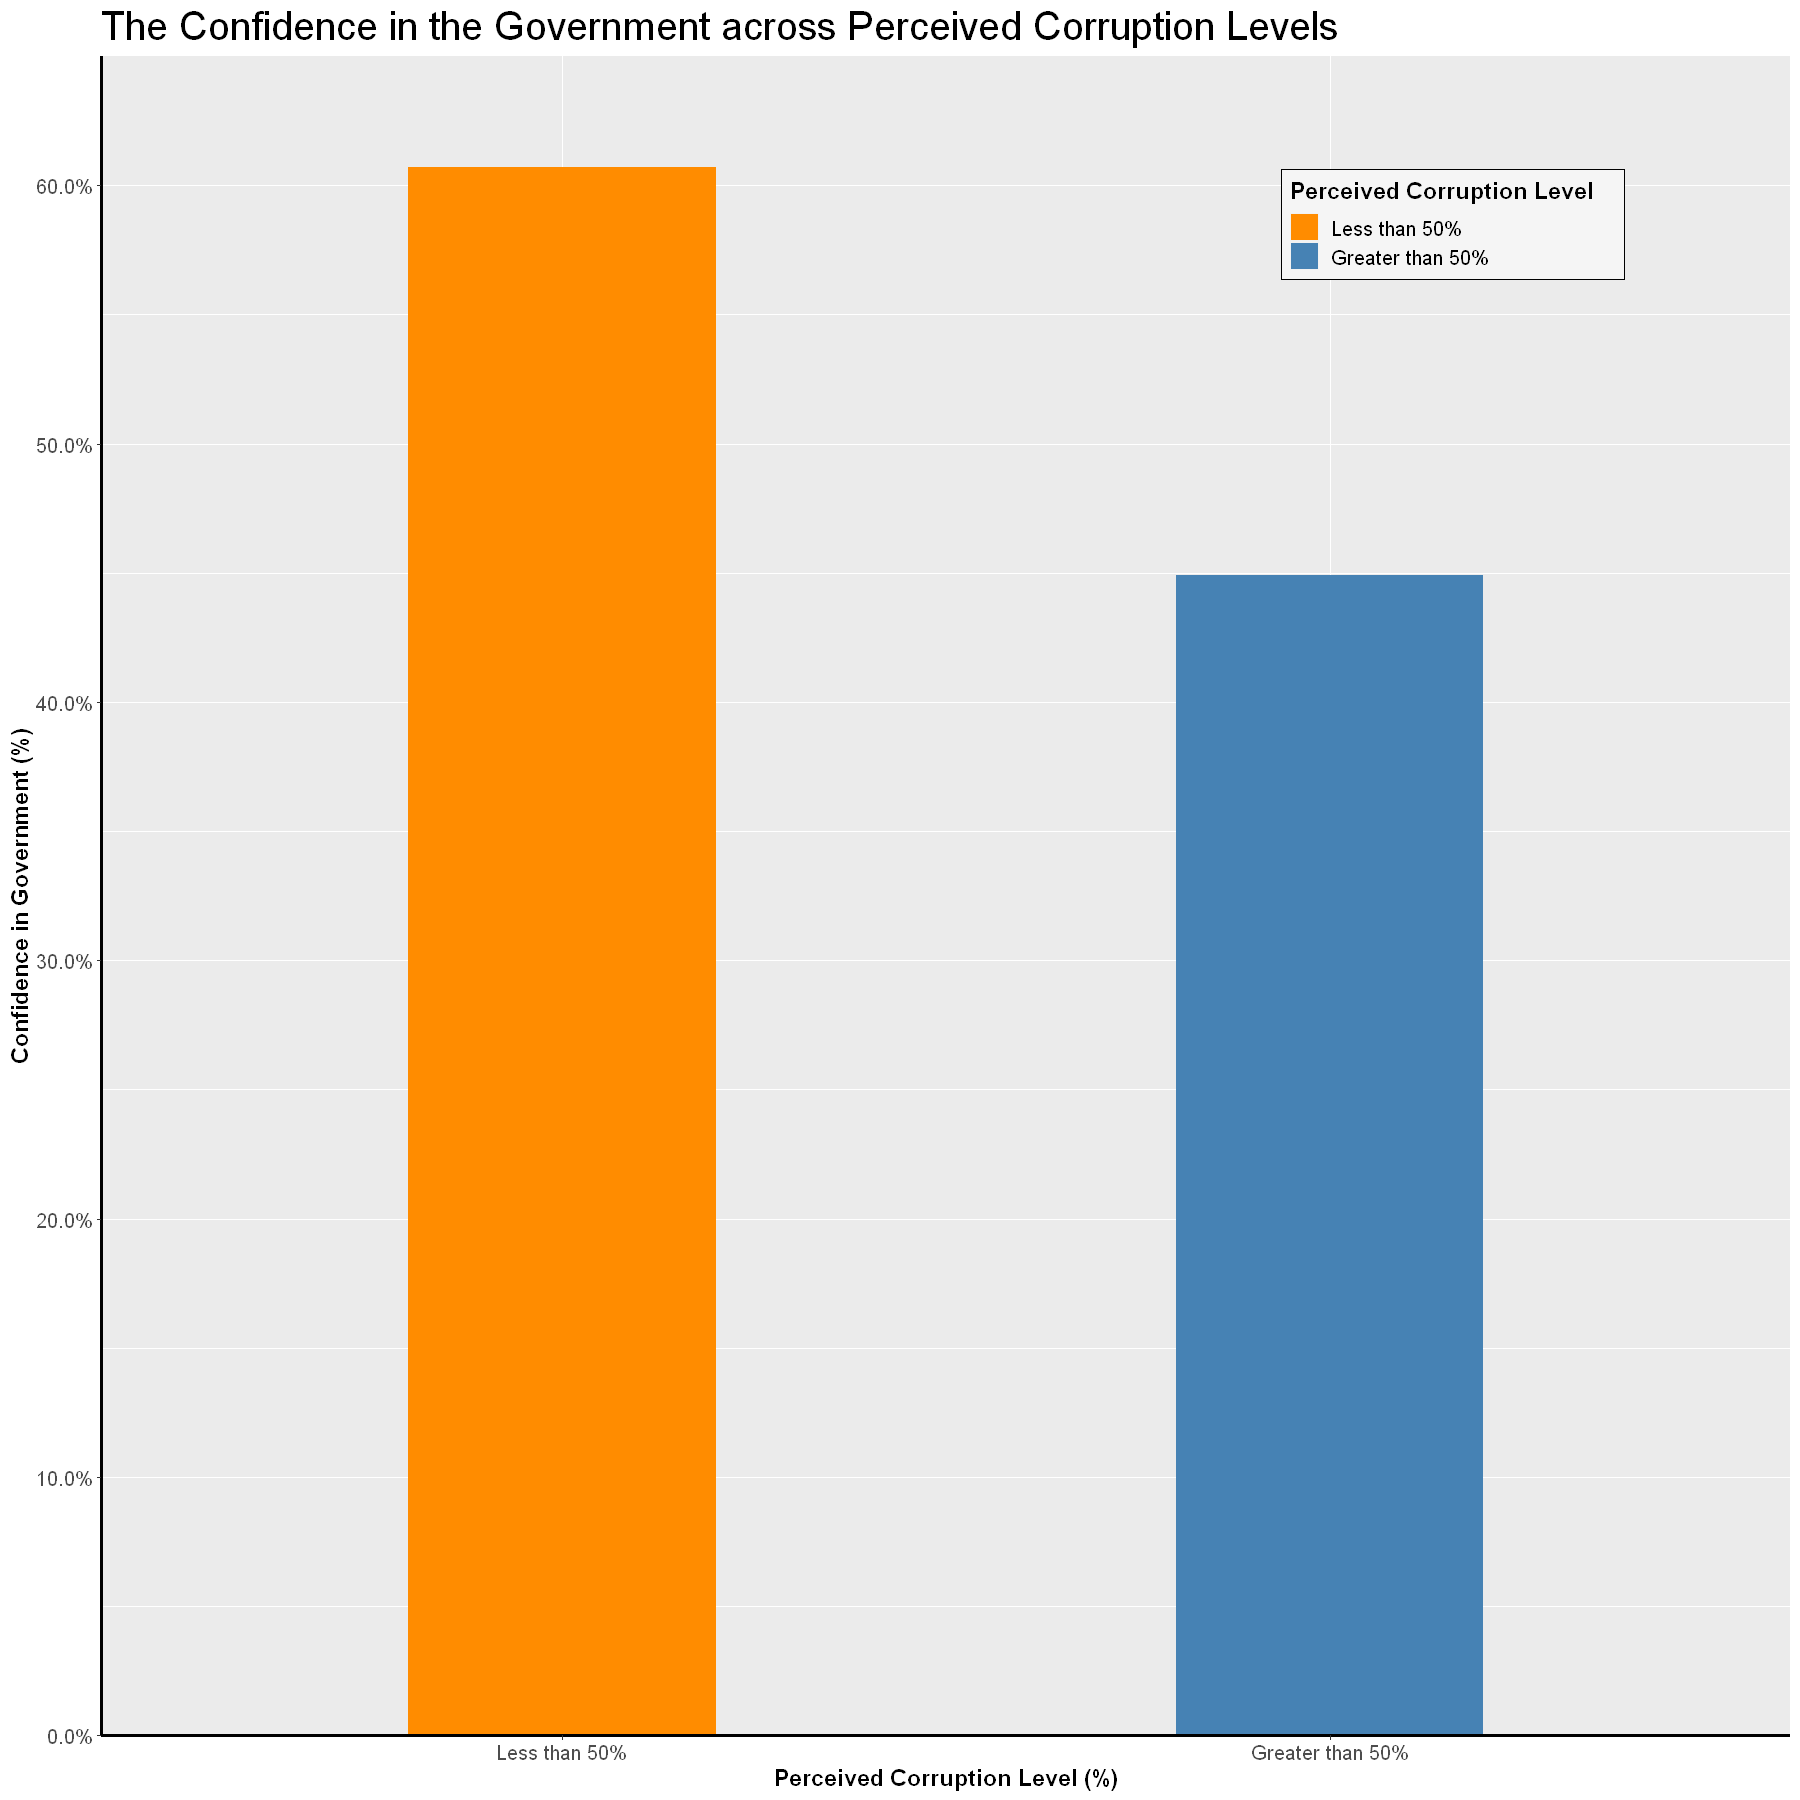

In [35]:
# Create the lists for the Corruption Levels and the Government Confidence percentage.
corr_level = c("Less than 50%", "Greater than 50%")
conf_level = c()

# Calculate the mean values for Confidence in Government for both corruption levels.
conf_level[1] <- mean(filter(cleaned_df, cleaned_df$Perception_of_Corruption < .5)[[11]], na.rm=TRUE)
conf_level[2] <- mean(filter(cleaned_df, cleaned_df$Perception_of_Corruption > .5)[[11]], na.rm=TRUE)

# Merge the two lists into a single dataframe for graphing.
corr_df <- do.call(rbind, Map(data.frame, corr = corr_level, conf = conf_level))

ggplot(data = corr_df, aes(x = corr, y = conf, fill = corr)) +
    ggtitle("The Confidence in the Government across Perceived Corruption Levels") +
    geom_bar(stat = "identity", width = .4) +
    theme(axis.line = element_line(colour = "black", size = 1, linetype = "solid"),
          axis.text=element_text(size=12),
          axis.title=element_text(size=14,face="bold"),
          plot.title = element_text(size=24),
          legend.position = c(0.8, 0.9),
          legend.title = element_text(size = 14, face="bold"),
          legend.text = element_text(size = 12),
          legend.background = element_rect(fill="grey96", size=0.5, linetype="solid", color = "black")) +
    scale_x_discrete(name = "Perceived Corruption Level (%)") +
    scale_y_continuous(name = "Confidence in Government (%)", 
                       breaks = scales::pretty_breaks(n = 5), 
                       labels = scales::percent, expand = c(0, 0), 
                       limits = c(0, 0.65)) +
    scale_fill_manual(values=c("darkorange", "steelblue"), name = "Perceived Corruption Level")

<b style="font-size:25px;">Graph Three</b><br>
<p style="font-family: Lucida Grande; font-size: 20px;">For the third graph, we look at the level of Social Support in a country, and its effect on both the life expectancy of its citizens, as well as their freedom in making life choices. For this chart, the attempt is to display both of these relationships on a single plot, but maintaining the consistent clarity of our previous graphs.<br><br>The completed chart uses a combination of line-graphs and area-graphs for clarity and visual flare. The different levels of Social Support are mapped to the x axis, while the Y axis serves to both represent the years (in the case of our Life Expectancy graph), and percentage (in the case of the Freedom to Make Life Choices graph). This is made clear in the legend, where each of the line-area graphs are color coded in the same scheme as the previous charts.</p>

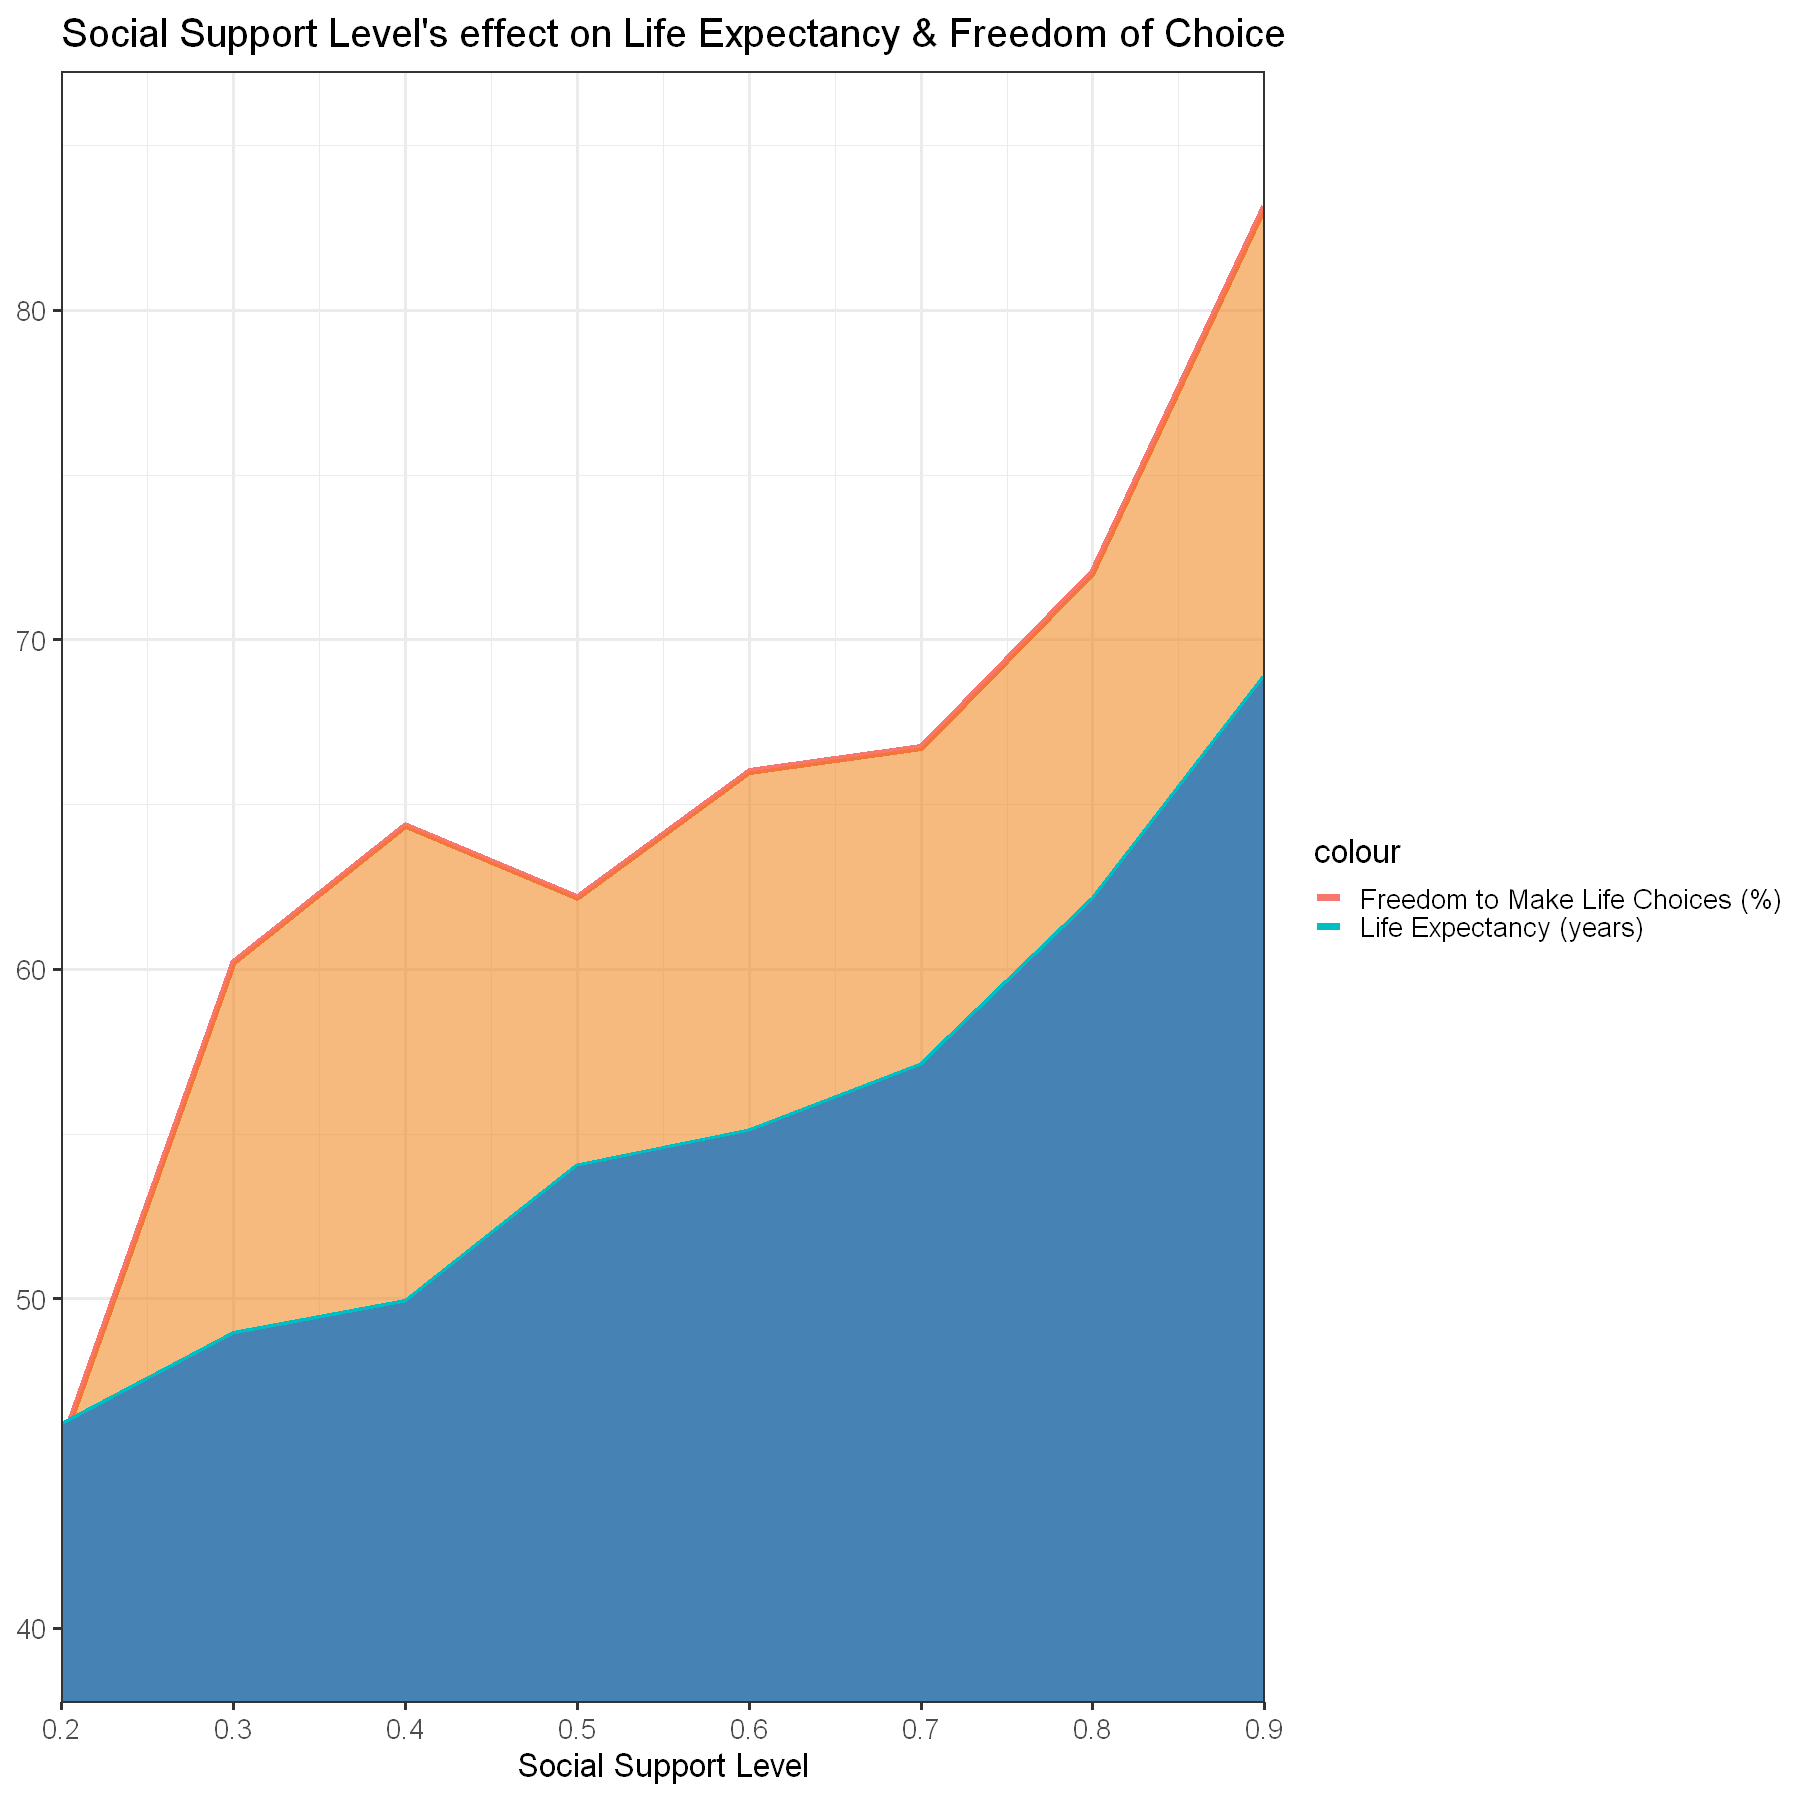

In [36]:
# Create the lists for each of our variables: social support level, freedom percentage, and
# average life expecancy.
x = 1
ss_level = c(0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9)
ss_life = c()
ss_free = c()

# Calculate the average life expectancy and freedom percentage for each social support level range, 
# ie: [0.1-0.2], [0.2-0.3], etc.
for (i in ss_level) {
    ss_life[x] <- mean(filter(cleaned_df, cleaned_df$Social_Support > i & cleaned_df$Social_Support < i + 0.1)[[8]], na.rm=TRUE)
    ss_free[x] <- mean(filter(cleaned_df, cleaned_df$Social_Support > i & cleaned_df$Social_Support < i + 0.1)[[9]], na.rm=TRUE) * 100
    x = x + 1
}

# Merge the three lists into a single dataframe for graphing.
ss_df <- do.call(rbind, Map(data.frame, ss = ss_level, le = ss_life, free = ss_free))

# Create a ggplot, with seperate geom_line() and geom_area() for both of the attributes. 
ggplot(data=ss_df, aes(x=ss)) +
    ggtitle("Social Support Level's effect on Life Expectancy & Freedom of Choice") +
    geom_line(aes(y = ss_free, colour = "Freedom to Make Life Choices (%)"), size = 2) +
    geom_area(aes(y = ss_free), fill="darkorange2", alpha = 0.5) +
    geom_line(aes(y = le, colour = "Life Expectancy (years)"), size = 2) +
    geom_area(aes(y = le), fill="steelblue") +
    scale_y_continuous("Value", limits=c(40,85),oob = rescale_none) +
    scale_x_continuous("Social Support Level", limits = c(0.2,0.9), expand = c(0, 0), breaks = seq(0.2, 0.9, 0.1)) +
    theme_bw(base_size = 20) +
    theme(axis.title.y = element_blank())

<b style="font-size:25px;">Graph Four</b><br>
<p style="font-family: Lucida Grande; font-size: 20px;">For the final graph, we look to tie the entire story together with a final visualization which summarises the findings in our dataset. With this in mind, we create a four-figure world map graph which shows the levels of each of the four main variables across each country. By visualizing them side-by-side, it reiterates the findings in an easy to see manner. As with all the previous graphs, the code is commented to describe its function.<br><br>The final chart contains four world maps, each using a color gradient to show the levels of each variable respectively.</p>

Warning message:
"Column `region` joining character vector and factor, coercing into character vector"

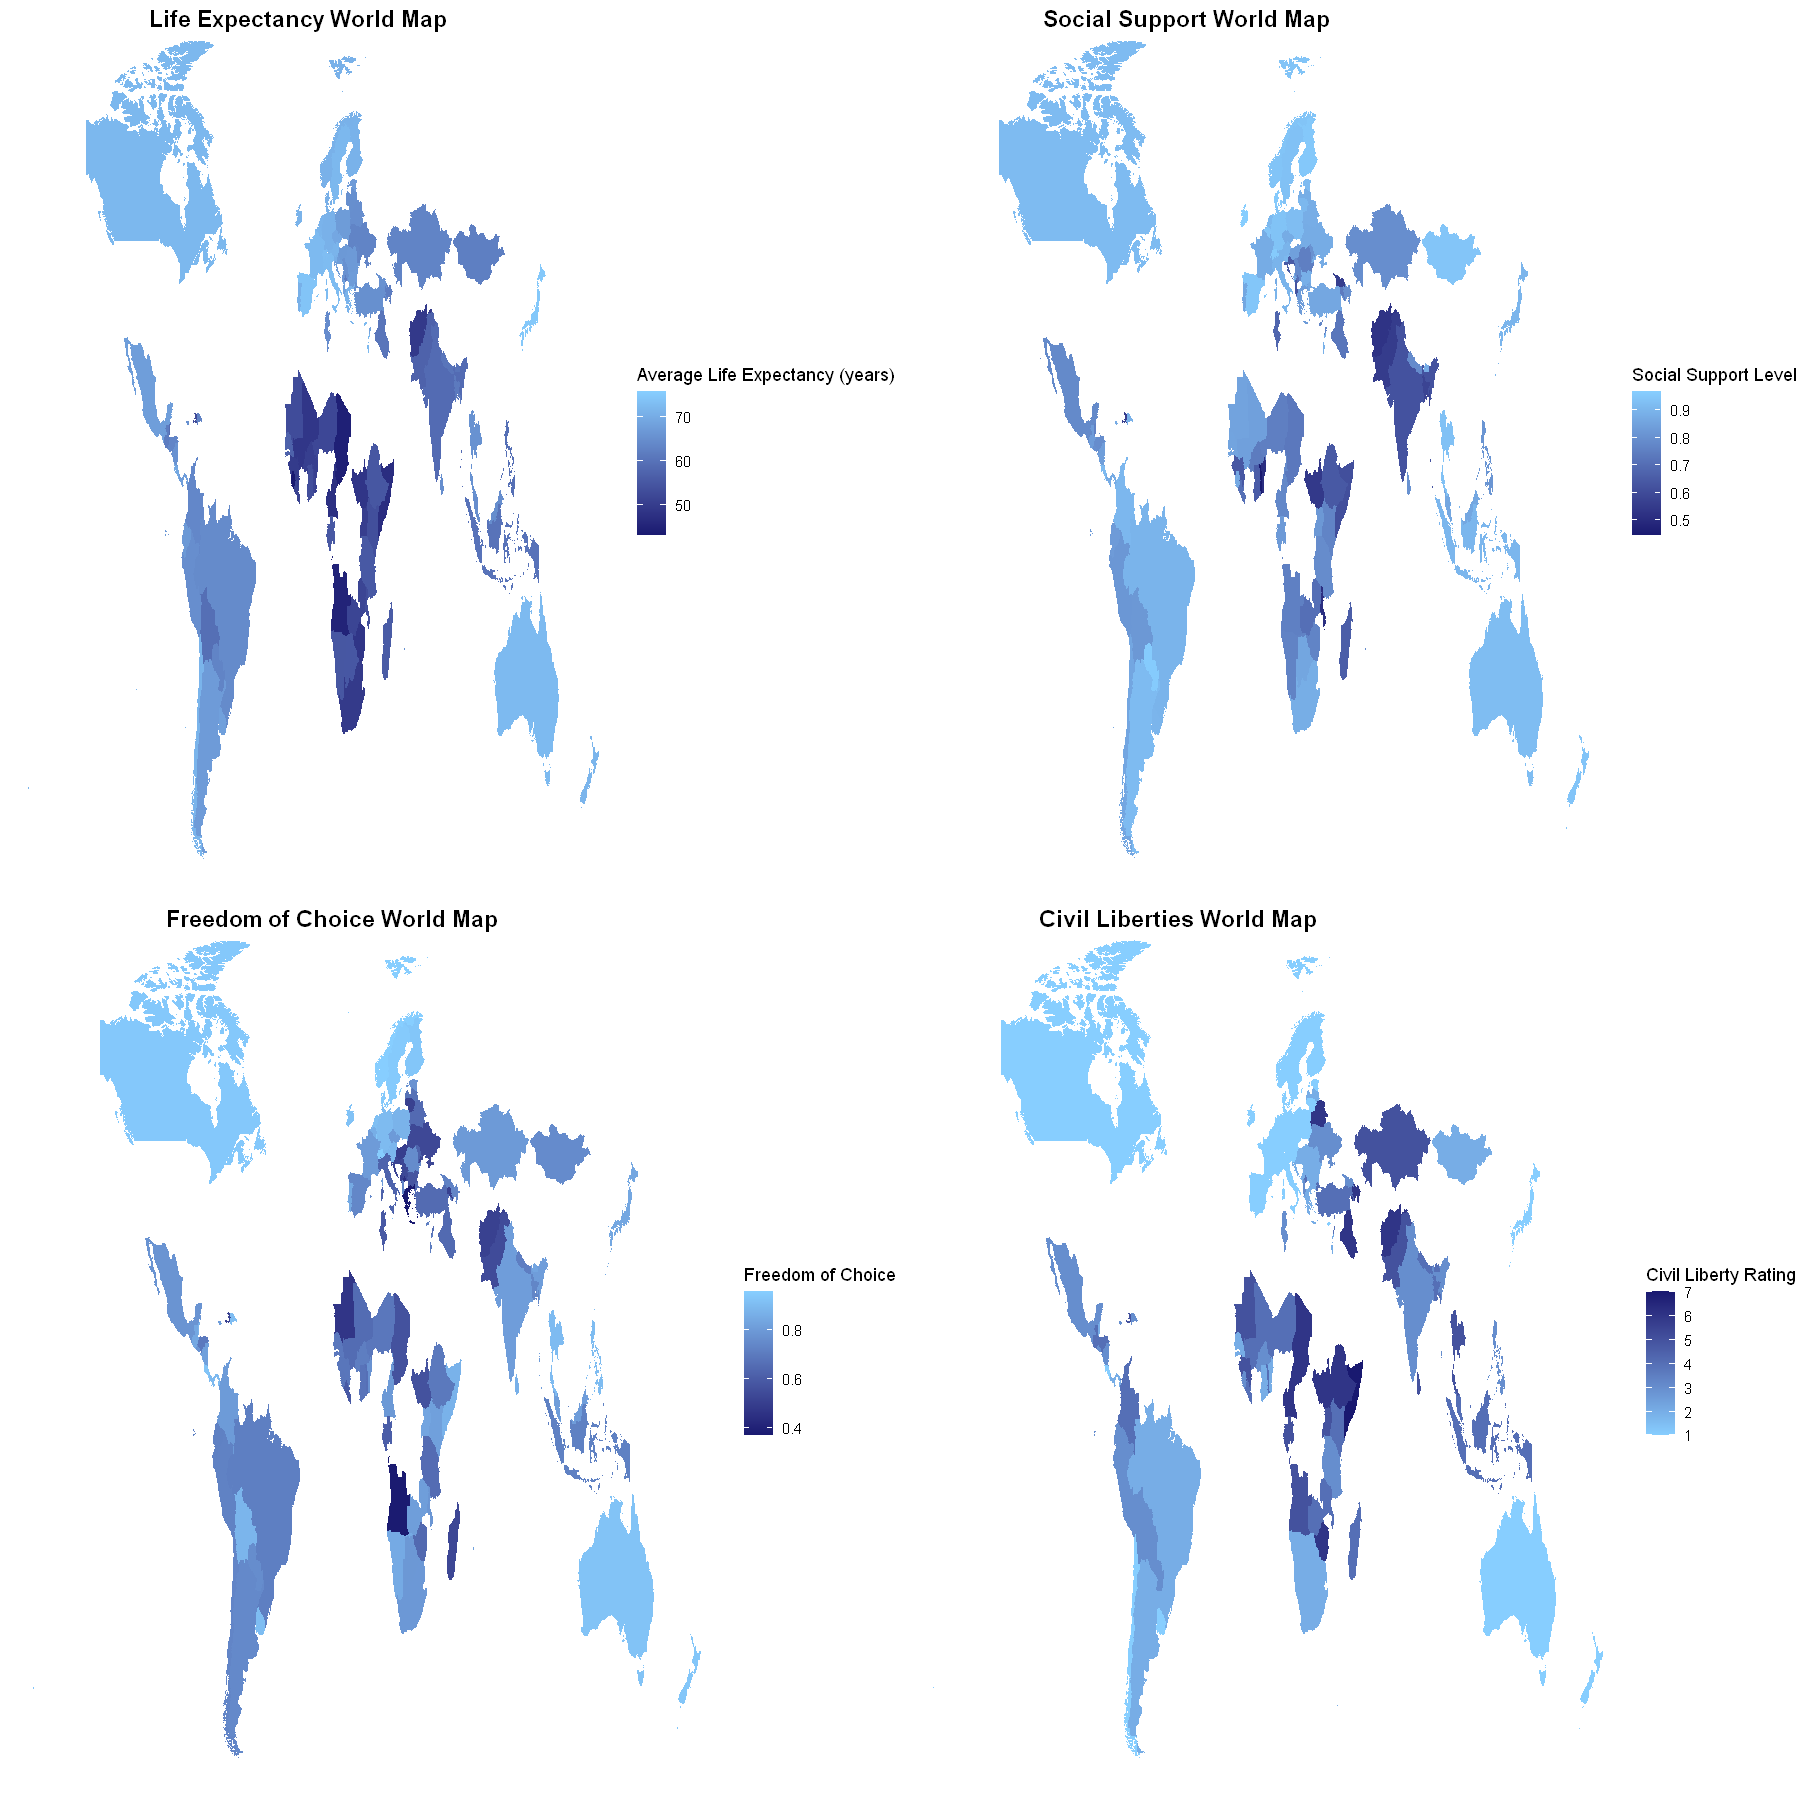

In [38]:
# Gather world map data for graphing.
world_map <- map_data("world")
region.lab.data <- world_map %>%
  group_by(region) %>%
  summarise(long = mean(long), lat = mean(lat))

# Create a new dataframe filtered for only a single year, in this case 2014 as it contained the most data. Rename the 
# attribute 'Country Name' to 'region' to allow for merging, before finally selecting only the four necessary variables.
data_df <- filter(cleaned_df, cleaned_df$Year == 2014)
colnames(data_df)[1] <- "region"
data_df <- data_df[,c("region", "Life_Expectancy", "Social_Support", "Freedom_Life_Choices", "Civil_Liberties")]

# Combine the world dataset with the newly made dataset using a right_join instead of a merge. This is to avoid the
# row reordering that occured which caused the polygon drawing to get severly affected.
PlotData <- right_join(world_map, data_df, by="region") 

# Create out four plots using the combined dataset.
plot1 <- ggplot(PlotData, aes(x = long, y = lat)) +
              geom_polygon(aes( group = group, fill = Life_Expectancy))+
              scale_fill_gradient(name = "Average Life Expectancy (years)", 
                                  low = "midnightblue", high = "skyblue1") +
              theme_void()

plot2 <- ggplot(PlotData, aes(x = long, y = lat)) +
              geom_polygon(aes( group = group, fill = Social_Support))+
              scale_fill_gradient(name = "Social Support Level",
                                  low = "midnightblue", high = "skyblue1") +
              theme_void()

plot3 <- ggplot(PlotData, aes(x = long, y = lat)) +
              geom_polygon(aes( group = group, fill = Freedom_Life_Choices)) +
              scale_fill_gradient(name = "Freedom of Choice",
                                  low = "midnightblue", high = "skyblue1") +
              theme_void()

plot4 <- ggplot(PlotData, aes(x = long, y = lat)) +
              geom_polygon(aes( group = group, fill = Civil_Liberties)) +
              scale_fill_gradient(name = "Civil Liberty Rating",
                                  low = "skyblue1", high = "midnightblue") +
              theme_void()

# Create a final figure with each of the four plots displayed in a 2x2 matrix.
figure <- ggarrange(plot1, plot2, plot3, plot4,
                    labels = c("Life Expectancy World Map", 
                               "Social Support World Map",
                               "Freedom of Choice World Map",
                               "Civil Liberties World Map"),
                    ncol = 2, nrow = 2)

figure